<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<b>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./431_CAMS_EAC4_tcco_exercise.ipynb"><< 431 - CAMS Global reanalysis (EAC4) - AOD - Exercise</a><span style="float:right;"><a href="./442_Metop-ABC_IASI_O3_L2_exercise.ipynb">442 - Metop-A/B/C IASI - Ozone - Level 2 - Exercise >></a></span>

<div class="alert alert-block alert-danger">
<b>40 - EXERCISES</b>
</div>

<div class="alert alert-block alert-danger">

<b>PREREQUISITES </b>

The following **30 - CASE STUDY** module is a prerequisite:

- [333 - Antarctic Ozone hole 2020 - Metop-A/B/C GOME-2 Level 2](../30_case_studies/333_stratospheric_ozone_Antarctic_2020_Metop-ABC_GOME-2_O3_L2.ipynb)    
    
It is recommended to go through the module before you do this exercise workbook.
</div>

<hr>

# 4.4.1 Metop-A, -B, -C GOME-2 Level-2 - Arctic Ozone hole

This notebook is an `exercise workbook` which allows you to practise the preparation of GOME-2 Level-2 data to analyse and animate the Arctic ozone hole in March 2020. 

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code.
You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

<br>

### Outline

* [Load Metop-A/B/C GOME-2 Total Column Ozone Level-2 data and aggregate it](#load_13)
* [Binning of Metop-A/B/C GOME-2 Level-2 data onto a regular two-dimensional grid](#gridding_13)
* [*Optional: Loop through all the folders of Metop-A/B/C GOME-2 Level 2 data and create daily gridded netCDF files*](#optional_loop_13)
* [Animate daily gridded Metop-A/B/C GOME-2 Level-2 Ozone information for each day in March 2020](#animate_13)


<hr>

#### Load required libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import glob

from netCDF4 import Dataset
import pandas as pd


from matplotlib import animation

from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='load_13'></a>Load Metop-A/B/C GOME-2 Total Column Ozone Level-2 data and aggregate it

#### Load daily Metop-A/B/C GOME-2 Total Column Ozone Level-2 data as `xarray.DataArray`

Metop-A GOME-2 Level-2 data are disseminated in the `HDF5` format and are organised in five groups, internally:
* `META_DATA`
 * Product Metadata
* `GEOLOCATION`
 * Date & Time (all retrievals)
 * 4 Corner Coordinates & Centre of Ground Pixel
 * Solar, Line-of-Sight Zenith, and realtive Azimuth angles at TOA
 * Orbit information
* `TOTAL_COLUMNS`
 * Total and tropospheric column amounts of the various trace gases with corresponding (relative) errors
* `DETAILED_RESULTS`
 * Geophysical parameters (surface, cloud and aerosol values)
 * Vertical column, slant column, and AMF values with corresponding errors
 * Fittings diagnostics (chi-square, RMS, etc.)
 * Various subgroups for trace gas specific data (e.g. O<sub>3</sub>, NO<sub>2</sub>, SO<sub>2</sub>, etc.)
* `CLOUD_PROPERTIES`
 * Retrieve cloud properties


Relevant information is in the groups `GEOLOCATION`, `TOTAL_COLUMNS` and `CLOUD_PROPERTIES`. With the help of the function [load_l2_data_xr](./functions.ipynb#load_l2_data_xr), you can generate a `xarray.DataArray` object by using information stored in the groups of the data file. The data files for this workflow are in the data directory `/eodata/gome2/offline/2a/2020/09/`.

The function generates a `xarray.DataArray` from a given set of `HDF5` files and matches variable information with latitude and longitude information. The result is a `xarray.DataArray` with one dimension and `latitude` and `longitude` information as coordinates.

Let us first load the Ozone data for 1 March 2020 by using the following function kwargs:
> directory=**(directory_2a, folder_list_2a[0]**<br>
> internal_filepath=**'TOTAL_COLUMNS'** <br>
> parameter=**'O3'**<br>
> lat_path=**'GEOLOCATION/LatitudeCentre'**<br>
> lon_path=**'GEOLOCATION/LongitudeCentre'** <br>
> no_of_dims=**1** <br>
> paramname=**'O3'** <br>
> unit=**'DU'** <br>
> longname=**'Tropospheric column density of O3'**


As we want to load the Ozone data for each day in March 2020, you can already load all folders of the March folder in a list of folders.

In [3]:
directory_2a = '../eodata/gome2/offline/2a/2020/03/'
folder_list_2a = glob.glob(directory_2a+'/*')
folder_list_2a.sort()

#### Load the Metop-A GOME-2 Level 2 data as `xarray.DataArray`

The first step is to load the Metop-A GOME-2 Level 2 data for one day as `xarray.DataArray`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which loads the first day in March 2020 of the Metop-A GOME-2 data as `xarray.DataArray`. As parameter, you are interested in `O3`. You can name the data array with `data_array_a`.
    
<br>

**HINT:** <br>
You can use the function [load_l2_data_xr](../functions.ipynb#load_l2_data_xr) for this operation.
</div>

In [4]:
# Enter your code here








In [5]:
data_array_a = load_l2_data_xr(directory=folder_list_2a[0], 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_a

<xarray.DataArray 'O3' (ground_pixel: 211163)>
array([257.86655, 257.57175, 259.25836, ..., 255.99936, 250.84825,
       248.08517], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 78.55 78.5 78.44 ... -84.42 -84.41 -84.39
    longitude  (ground_pixel) float32 198.8 197.0 195.2 ... 45.59 41.96 38.35
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Inspect the loaded `xarray.DataArray`:
- How many dimensions does the data array have?
- Is there an indication of how many data points were loaded?
</div>

The loaded data array has one dimensions (`ground_pixel`) and a total of 211163 ground pixel information was loaded.

<br>

#### Load the Metop-B GOME-2 Level 2 data as `xarray.DataArray`

We repeat the same procedure as above for the GOME-2 Level-2 Ozone data files from the Metop-B satellite. Metop-B data files are in the folder directory `/eodata/gome2/offline/2b/2020/03/`.

In [6]:
directory_2b = '../eodata/gome2/offline/2b/2020/03/'
folder_list_2b = glob.glob(directory_2b+'/*')
folder_list_2b.sort()

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which loads the first day in March 2020 of the Metop-B GOME-2 data as `xarray.DataArray`. As parameter, you are interested in `O3`. You can name the data array with `data_array_b`.
    
<br>

**HINT:** <br>
You can use the function [load_l2_data_xr](../functions.ipynb#load_l2_data_xr) for this operation.
</div>

In [7]:
# Enter your code below








In [8]:
data_array_b = load_l2_data_xr(directory=folder_list_2b[0], 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_b

<xarray.DataArray 'O3' (ground_pixel: 209865)>
array([287.82648, 290.50812, 293.8047 , ..., 281.84668, 277.51248,
       274.35376], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 75.51 75.47 75.41 ... -86.62 -86.41 -86.19
    longitude  (ground_pixel) float32 216.1 214.7 213.3 ... 28.03 23.34 19.14
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Inspect the loaded `xarray.DataArray`:
- How many ground pixel information was loaded from the Metop-B GOME-2 Level 2?
</div>

A total of 209865 ground pixel information was loaded from the Metop-B GOME-2 Level 2 data.

<br>

#### Load the Metop-C GOME-2 Level 2 data as `xarray.DataArray`

And the same procedure is repeated again for the GOME-2 Level-2 Ozone data files of Metop-C. The data files are in the folder directory `/eodata/gome2/offline/2c/2020/03/`.

In [9]:
directory_2c = '../eodata/gome2/offline/2c/2020/03/'
folder_list_2c = glob.glob(directory_2c+'/*')
folder_list_2c.sort()

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which loads the first day in March 2020 of the Metop-C GOME-2 data as `xarray.DataArray`. As parameter, you are interested in `O3`. You can name the data array with `data_array_c`.
    
<br>

**HINT:** <br>
You can use the function [load_l2_data_xr](../functions.ipynb#load_l2_data_xr) for this operation.
</div>

In [10]:
# Enter your code below








In [11]:
data_array_c = load_l2_data_xr(directory=folder_list_2c[0], 
                             internal_filepath='TOTAL_COLUMNS', 
                             parameter='O3', 
                             lat_path='GEOLOCATION/LatitudeCentre', 
                             lon_path='GEOLOCATION/LongitudeCentre', 
                             no_of_dims=1, 
                             paramname='O3',
                             unit='DU',
                             longname='Tropospheric column density of O3')

data_array_c

<xarray.DataArray 'O3' (ground_pixel: 210792)>
array([264.1289 , 265.22217, 267.3188 , ..., 276.74435, 278.68613,
       276.46472], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 75.59 75.54 75.49 ... -86.62 -86.43 -86.21
    longitude  (ground_pixel) float32 203.5 202.1 200.7 ... 17.46 12.61 8.288
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Inspect the loaded `xarray.DataArray`:
- How many ground pixel information was loaded from the Metop-C GOME-2 Level 2 data?
</div>

A total of 210792 ground pixel information was loaded from the Metop-C GOME-2 Level 2 data.

<br>

#### Load cloud fraction information

In the previous section, you loaded the GOME-2 Level-2 Ozone information from the three satellites Metop-A, Metop-B and Metop-C. 
The next step is to load the `CloudFraction` information, for the three satellites, Metop-A, Metop-B and Metop-C. 

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which loads the `CloudFraction` information of the first day in March 2020 of the Metop-A GOME-2 data as `xarray.DataArray`. As internal filepath and parameter, you can specify `CLOUD_PROPERTIES` and `CloudFraction` respectively.
    
<br>

**HINT:** <br>
You can use again the function [load_l2_data_xr](../functions.ipynb#load_l2_data_xr) for this operation.
</div>

In [12]:
# Enter your code below








In [13]:
cloud_fraction_a = load_l2_data_xr(directory=folder_list_2a[0],
                                   internal_filepath='CLOUD_PROPERTIES',
                                   parameter='CloudFraction', 
                                   lat_path='GEOLOCATION/LatitudeCentre', 
                                   lon_path='GEOLOCATION/LongitudeCentre', 
                                   no_of_dims=1, 
                                   paramname='CloudFraction',
                                   unit='-',
                                   longname='Cloud Fraction') 
cloud_fraction_a

<xarray.DataArray 'CloudFraction' (ground_pixel: 211163)>
array([0.9896364 , 0.8773051 , 0.9714895 , ..., 0.7652889 , 0.7581082 ,
       0.75459504], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 78.55 78.5 78.44 ... -84.42 -84.41 -84.39
    longitude  (ground_pixel) float32 198.8 197.0 195.2 ... 45.59 41.96 38.35
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

The next step is to load the `CloudFraction` information for the data files from the Metop-B satellite.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which loads the `CloudFraction` information of the first day in March 2020 of the Metop-B GOME-2 data as `xarray.DataArray`. As internal filepath and parameter, you can specify `CLOUD_PROPERTIES` and `CloudFraction` respectively.
    
<br>

**HINT:** <br>
You can use again the function [load_l2_data_xr](../functions.ipynb#load_l2_data_xr) for this operation.
</div>

In [14]:
# Enter your code below










In [15]:
cloud_fraction_b = load_l2_data_xr(folder_list_2b[0],
                                    'CLOUD_PROPERTIES',
                                    'CloudFraction', 
                                    'GEOLOCATION/LatitudeCentre', 
                                    'GEOLOCATION/LongitudeCentre', 
                                    no_of_dims=1, 
                                    paramname='CloudFraction',
                                    longname='Cloud Fraction',
                                    unit='-') 
cloud_fraction_b

<xarray.DataArray 'CloudFraction' (ground_pixel: 209865)>
array([0.9883544 , 0.97632164, 0.9713981 , ..., 0.67418593, 0.7164886 ,
       0.75304663], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 75.51 75.47 75.41 ... -86.62 -86.41 -86.19
    longitude  (ground_pixel) float32 216.1 214.7 213.3 ... 28.03 23.34 19.14
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

And the final step is to repeat the same procedure for the data files from the Metop-C satellite.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which loads the `CloudFraction` information of the first day in March 2020 of the Metop-C GOME-2 data as `xarray.DataArray`. As internal filepath and parameter, you can specify `CLOUD_PROPERTIES` and `CloudFraction` respectively.
    
<br>

**HINT:** <br>
You can use again the function [load_l2_data_xr](../functions.ipynb#load_l2_data_xr) for this operation.
</div>

In [16]:
# Enter you code below










In [17]:
cloud_fraction_c = load_l2_data_xr(folder_list_2c[0],
                                    'CLOUD_PROPERTIES',
                                    'CloudFraction', 
                                    'GEOLOCATION/LatitudeCentre', 
                                    'GEOLOCATION/LongitudeCentre',
                                    no_of_dims=1, 
                                    paramname='CloudFraction', 
                                    longname='Cloud Fraction',
                                    unit='-') 
cloud_fraction_c

<xarray.DataArray 'CloudFraction' (ground_pixel: 210792)>
array([0.9966902 , 0.99062806, 0.9735477 , ..., 0.5965696 , 0.65774244,
       0.73912144], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 75.59 75.54 75.49 ... -86.62 -86.43 -86.21
    longitude  (ground_pixel) float32 203.5 202.1 200.7 ... 17.46 12.61 8.288
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud Fraction
    units:      -

<br>

#### Concatenate the data and cloud fraction information from the three satellites Metop-A, -B and -C

The next step is to concatenate (combine) the ground pixel information from the three satellite Metop-A, -B and -C. 

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which concatenates the pixel information from the three data arrays `data_array_a`, `data_array_b` and `data_array_c`. As concatenation dimension, you can specify the dimension `ground_pixel`.
<br>    
Repeat the concatenation step also for the cloud fraction information.
    
<br>

**HINT:** <br>
You can use xarray's function `xr.concat()` for this operation.
</div>

In [18]:
# Enter your code below








In [19]:
data_abc = xr.concat([data_array_a, data_array_b, data_array_c], dim='ground_pixel')

cloud_fraction_abc = xr.concat([cloud_fraction_a, cloud_fraction_b, cloud_fraction_c], dim='ground_pixel')

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
 
- What is the total number of ground pixels of each array? You might want to print both data arrays.
</div>

You see that for 1 March 2020, there is a total of more than 630000 ground pixel information for GOME-2 Level-2 Ozone data.

In [ ]:
data_abc, cloud_fraction_abc

<br>

#### Mask the data array based on the cloud fraction information

Now you can mask the Ozone data (`data_abc`) with the help of the `CloudFraction` information.  

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which masks the data array `cloud_fraction_abc`, based on the `CloudFraction` information (`cloud_fraction_abc`).<br> 
You want to mask out all pixles with a cloud cover higher than 20% (> 0.2) and only keep pixels where the cloud cover is less than 20% (< 0.2).
    
<br>

**HINT:** <br>
You can use the function [generate_masked_array](../functions.ipynb#generate_masked_array) for this operation.<br>

You might want to set the `drop` kwarg to True. In this way, all the pixels that are masked out are dropped from the masked data array.

</div>

In [20]:
# Enter your code below







In [21]:
o3_abc_masked_cf = generate_masked_array(xarray=data_abc, 
                                         mask=cloud_fraction_abc, 
                                         threshold=0.2 , 
                                         operator='<', 
                                         drop=True)
o3_abc_masked_cf


<xarray.DataArray (ground_pixel: 230200)>
array([245.75412, 252.74994, 251.87749, ..., 286.38303, 283.42715,
       294.02832], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 79.58 79.31 79.03 ... -83.42 -84.94 -75.23
    longitude  (ground_pixel) float32 154.6 153.4 152.2 ... 88.86 105.3 64.45
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

<div class="alert alert-block alert-success">
<b>Question:</b><br>
 
- What is the the resulting number of ground pixels, when the kwarg `drop=TRUE` is set?
</div>

You see, that by setting `drop=True`, the number of ground pixels decreases from over 630000 to less than 231000.

<br>

#### Reassign the longitude values to a [-180, 180] longitude grid

GOME-2 Level-2 data are disseminated on a 0 to 360 degrees longitude grid. Thus, the last step before the gridding process, is to reassign the longitude values to a grid ranging from -180 degrees to 180 degrees.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which reassigns the longitude values to a grid ranging from -180 degrees to 180 degrees.<br> 

    
<br>

**HINT:** <br>
You can use the function `assign_coords()` for this operation.<br>

</div>

In [22]:
# Enter your code below








In [23]:
o3_abc_masked = o3_abc_masked_cf.assign_coords(longitude=(((o3_abc_masked_cf.longitude + 180) % 360) - 180))
o3_abc_masked

<xarray.DataArray (ground_pixel: 230200)>
array([245.75412, 252.74994, 251.87749, ..., 286.38303, 283.42715,
       294.02832], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 79.58 79.31 79.03 ... -83.42 -84.94 -75.23
    longitude  (ground_pixel) float32 154.6 153.4 152.2 ... 88.86 105.3 64.45
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

The `o3_abc_masked` object contains all the GOME-2 Level-2 Ozone ground pixel information, which you want to bring onto a regular-spaced two-dimensional latitude / longitude grid in the next step.

<br>

## <a id='gridding_13'></a>Binning of Metop-A/B/C GOME-2 Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `o3_abc_masked` array onto a regular two-dimensional grid. This process is called *binning*. As a preparation, you store the data values of `latitude`, `longitude` and `ozone` as variables x, y, z.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which selects the variables `latitude`, `longitude` and `ozone information` from the data array `o3_abc_masked`.<br> 
    
<br>

**HINT:** <br>
The data arrays of dimensions and variables of a `xarray.DataArray` can be retrieved with the command `data`.

</div>

In [24]:
# Enter your code below








In [25]:
y = o3_abc_masked.latitude.data
x = o3_abc_masked.longitude.data
z = o3_abc_masked.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

The next step is to bin the data onto a pre-defined two-dimensional grid (called bins).

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which bins the data onto a 1x1 degree grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin.<br>
    
Afterwards, build the arithmetic mean of all the data fallen into a bin with the help of the `counts` array.<br>
    
<br>

**HINT:** <br>
You can use the function `np.histogram2d` for this operation. A 1x1 degree grid is represented with `bins=(180,360)`.

</div>

In [26]:
# Enter your code below








In [27]:
zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
zi = zi / counts
zi

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 310.64553833,          nan, ...,          nan,
                 nan,          nan],
       [328.90844727,          nan,          nan, ..., 318.09127808,
        318.21429443, 325.35507202],
       ...,
       [         nan, 263.71569824, 260.78924561, ..., 269.78436279,
        266.97744751, 260.99910482],
       [259.58933004, 258.95883179,          nan, ..., 263.24905396,
        264.1325531 , 264.80465698],
       [259.99154154, 261.3119812 ,          nan, ...,          nan,
                 nan,          nan]])

Out of the binned information, you can create a `xarray.DataArray`, which gives you flexibility in further handling the regularly gridded Ozone values.

#### Create a `xarray.DataArray` of the regular gridded Ozone information

Let us create create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [28]:
day = pd.to_datetime('2020-03-'+folder_list_2a[0][35:])
xarray_abc = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': day,
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': o3_abc_masked.long_name, 'units': o3_abc_masked.units},
                name='O3'
            )

xarray_abc

<xarray.DataArray 'O3' (latitude: 180, longitude: 360)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 310.64553833,          nan, ...,          nan,
                 nan,          nan],
       [328.90844727,          nan,          nan, ..., 318.09127808,
        318.21429443, 325.35507202],
       ...,
       [         nan, 263.71569824, 260.78924561, ..., 269.78436279,
        266.97744751, 260.99910482],
       [259.58933004, 258.95883179,          nan, ..., 263.24905396,
        264.1325531 , 264.80465698],
       [259.99154154, 261.3119812 ,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    time       datetime64[ns] 2020-03-01
  * latitude   (latitude) float64 -85.87 -84.94 -84.02 ... 77.49 78.42 79.34
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Attributes:
    long_name:  Tropospheric column density of O3
    units:      DU

#### Visualize the gridded Ozone information

Let us visualize the gridded Ozone information for 1 March 2020. You can use the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh). As projection, you can use `ccrs.Orthographic` and set the latitude and longitude information to the Arctic. 

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which visualizes the data array `xarray_abc` on a `orthographic` projection. <br>
    

    
<br>

**HINT:** <br>
You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh).

</div>

In [29]:
# Enter your code below









(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'GOME-2 Gridded Level-3 data of tropospheric column density of Ozone for 1 March 2020'}>)

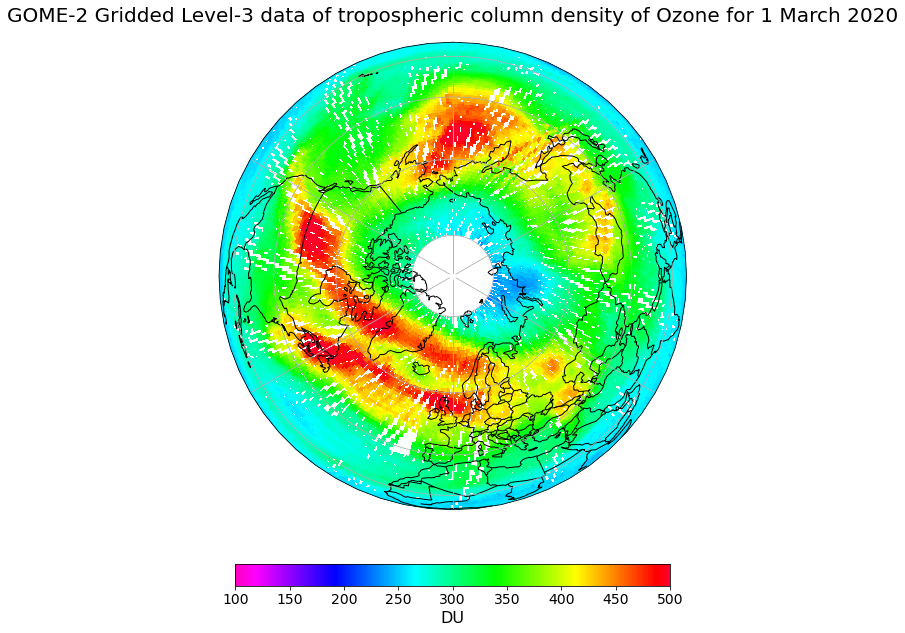

In [30]:
visualize_pcolormesh(data_array=xarray_abc, 
                     longitude=xarray_abc.longitude, 
                     latitude=xarray_abc.latitude, 
                     projection=ccrs.Orthographic(0,90), 
                     color_scale='gist_rainbow_r', 
                     unit='DU', 
                     long_name='GOME-2 Gridded Level-3 data of tropospheric column density of Ozone for 1 March 2020', 
                     vmin=100, 
                     vmax=500)

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./431_CAMS_EAC4_tcco_exercise.ipynb"><< 431 - CAMS Global reanalysis (EAC4) - AOD - Exercise</a><span style="float:right;"><a href="./442_Metop-ABC_IASI_O3_L2_exercise.ipynb">442 - Metop-A/B/C IASI - Ozone - Level 2 - Exercise >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>